In [134]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [163]:
df = pd.read_csv('K-Means.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,NaN,624,845,745,740,121,442,946,341,330,...,870,924,840,948,884,904,830,432,882,445
1,Southwest,3743,44,1325,2578,202,812,283,1102,1629,...,2,1,0,0,0,0,0,1,0,0
2,Central,5787,139,1288,3727,309,1519,402,2173,7351,...,2,0,2,0,0,2,0,0,0,0
3,N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,...,0,0,0,1,0,0,0,0,0,1
4,Mission,2111,21,762,1801,138,767,239,720,1451,...,1,0,0,0,0,0,0,0,0,0


In [164]:
df.index.name = None
df.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,NaN,624,845,745,740,121,442,946,341,330,...,870,924,840,948,884,904,830,432,882,445
1,Southwest,3743,44,1325,2578,202,812,283,1102,1629,...,2,1,0,0,0,0,0,1,0,0
2,Central,5787,139,1288,3727,309,1519,402,2173,7351,...,2,0,2,0,0,2,0,0,0,0
3,N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,...,0,0,0,1,0,0,0,0,0,1
4,Mission,2111,21,762,1801,138,767,239,720,1451,...,1,0,0,0,0,0,0,0,0,0


In [165]:
df.columns = df.iloc[0]
df.head()

,NaN,624.0,845.0,745.0,740.0,121.0,442.0,946.0,341.0,330.0,...,870.0,924.0,840.0,948.0,884.0,904.0,830.0,432.0,882.0,445.0
0,NaN,624,845,745,740,121,442,946,341,330,...,870,924,840,948,884,904,830,432,882,445
1,Southwest,3743,44,1325,2578,202,812,283,1102,1629,...,2,1,0,0,0,0,0,1,0,0
2,Central,5787,139,1288,3727,309,1519,402,2173,7351,...,2,0,2,0,0,2,0,0,0,0
3,N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,...,0,0,0,1,0,0,0,0,0,1
4,Mission,2111,21,762,1801,138,767,239,720,1451,...,1,0,0,0,0,0,0,0,0,0


In [166]:
df = df[1:]
df.head()

,NaN,624.0,845.0,745.0,740.0,121.0,442.0,946.0,341.0,330.0,...,870.0,924.0,840.0,948.0,884.0,904.0,830.0,432.0,882.0,445.0
1,Southwest,3743,44,1325,2578,202,812,283,1102,1629,...,2,1,0,0,0,0,0,1,0,0
2,Central,5787,139,1288,3727,309,1519,402,2173,7351,...,2,0,2,0,0,2,0,0,0,0
3,N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,...,0,0,0,1,0,0,0,0,0,1
4,Mission,2111,21,762,1801,138,767,239,720,1451,...,1,0,0,0,0,0,0,0,0,0
5,Devonshire,2185,11,632,1564,95,1188,245,1135,1965,...,1,1,0,0,0,0,1,0,0,0


In [167]:
df.index = df.iloc[:,0]

In [168]:
df= df.iloc[:,1:138]

In [169]:
df.head()

,624.0,845.0,745.0,740.0,121.0,442.0,946.0,341.0,330.0,930.0,...,353.0,870.0,924.0,840.0,948.0,884.0,904.0,830.0,432.0,882.0
nan,,,,,,,,,,,,,,,,,,,,,
Southwest,3743,44,1325,2578,202,812,283,1102,1629,1130,...,0,2,1,0,0,0,0,0,1,0
Central,5787,139,1288,3727,309,1519,402,2173,7351,1000,...,7,2,0,2,0,0,2,0,0,0
N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,532,...,2,0,0,0,1,0,0,0,0,0
Mission,2111,21,762,1801,138,767,239,720,1451,550,...,0,1,0,0,0,0,0,0,0,0
Devonshire,2185,11,632,1564,95,1188,245,1135,1965,583,...,0,1,1,0,0,0,0,1,0,0


In [170]:
df.isnull().sum()

0
624.0    0
845.0    0
745.0    0
740.0    0
121.0    0
        ..
884.0    0
904.0    0
830.0    0
432.0    0
882.0    0
Length: 137, dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Southwest to Olympic
Columns: 137 entries, 624.0 to 882.0
dtypes: int64(137)
memory usage: 22.6+ KB


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
624.0,21.0,2982.428571,897.935107,2009.0,2289.0,2675.0,3596.0,5787.0
845.0,21.0,38.333333,43.216124,1.0,11.0,16.0,63.0,143.0
745.0,21.0,1014.857143,252.512234,627.0,870.0,1007.0,1112.0,1539.0
740.0,21.0,2295.190476,491.269439,1564.0,1966.0,2302.0,2578.0,3727.0
121.0,21.0,149.047619,60.304624,67.0,110.0,138.0,173.0,309.0
...,...,...,...,...,...,...,...,...
884.0,21.0,0.142857,0.478091,0.0,0.0,0.0,0.0,2.0
904.0,21.0,0.190476,0.511766,0.0,0.0,0.0,0.0,2.0
830.0,21.0,0.238095,0.538958,0.0,0.0,0.0,0.0,2.0


array([[<Axes: title={'center': '624.0'}>,
        <Axes: title={'center': '845.0'}>,
        <Axes: title={'center': '745.0'}>,
        <Axes: title={'center': '740.0'}>,
        <Axes: title={'center': '121.0'}>,
        <Axes: title={'center': '442.0'}>,
        <Axes: title={'center': '946.0'}>,
        <Axes: title={'center': '341.0'}>,
        <Axes: title={'center': '330.0'}>,
        <Axes: title={'center': '930.0'}>,
        <Axes: title={'center': '648.0'}>,
        <Axes: title={'center': '626.0'}>],
       [<Axes: title={'center': '440.0'}>,
        <Axes: title={'center': '354.0'}>,
        <Axes: title={'center': '210.0'}>,
        <Axes: title={'center': '230.0'}>,
        <Axes: title={'center': '310.0'}>,
        <Axes: title={'center': '510.0'}>,
        <Axes: title={'center': '420.0'}>,
        <Axes: title={'center': '761.0'}>,
        <Axes: title={'center': '236.0'}>,
        <Axes: title={'center': '662.0'}>,
        <Axes: title={'center': '350.0'}>,
        <A

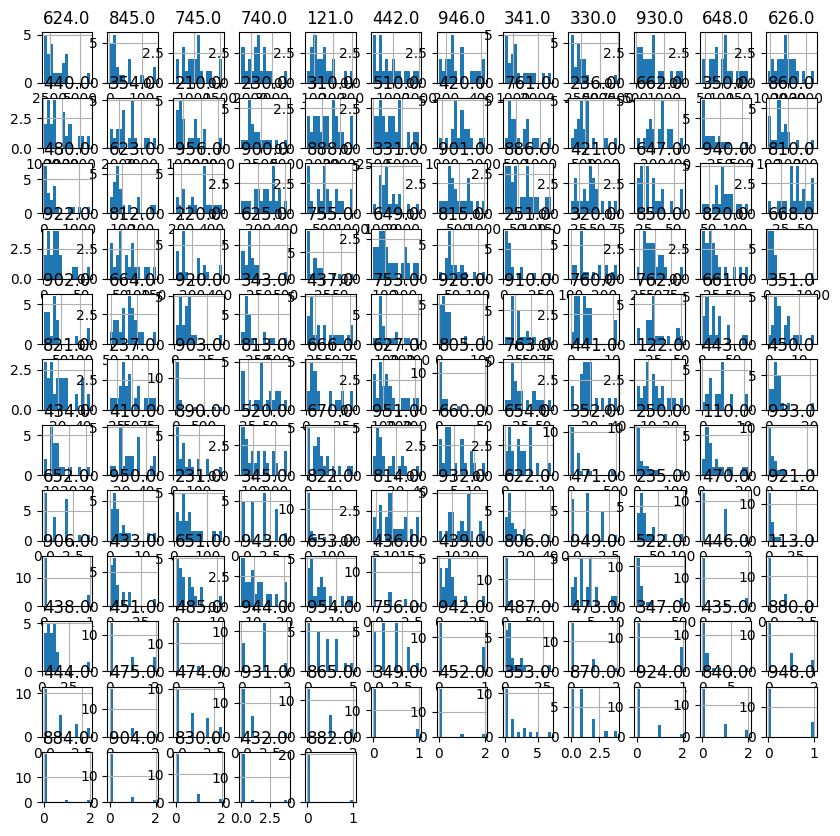

In [173]:
df.hist(bins=15,figsize=(10,10))

In [174]:
kmeans = KMeans(n_clusters=21)

In [ ]:
print(kmeans)

In [176]:
k_fit= kmeans.fit(df)

In [177]:
k_fit.n_clusters

21

In [178]:
k_fit.cluster_centers_

array([[2.009e+03, 1.100e+01, 7.600e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.774e+03, 9.000e+00, 1.112e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.388e+03, 1.600e+01, 8.780e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.289e+03, 7.000e+00, 6.270e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.613e+03, 6.300e+01, 1.120e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.259e+03, 3.500e+01, 7.700e+02, ..., 0.000e+00, 4.000e+00,
        0.000e+00]])

In [179]:
k_fit.labels_

array([10,  4, 15, 16, 17, 12, 19,  2, 20,  7, 13,  5, 14,  8,  6,  3,  9,
       11, 18,  0,  1], dtype=int32)

In [180]:
kmeans= KMeans(n_clusters=21)
k_fit = kmeans.fit(df)

In [181]:
clusters = k_fit.labels_

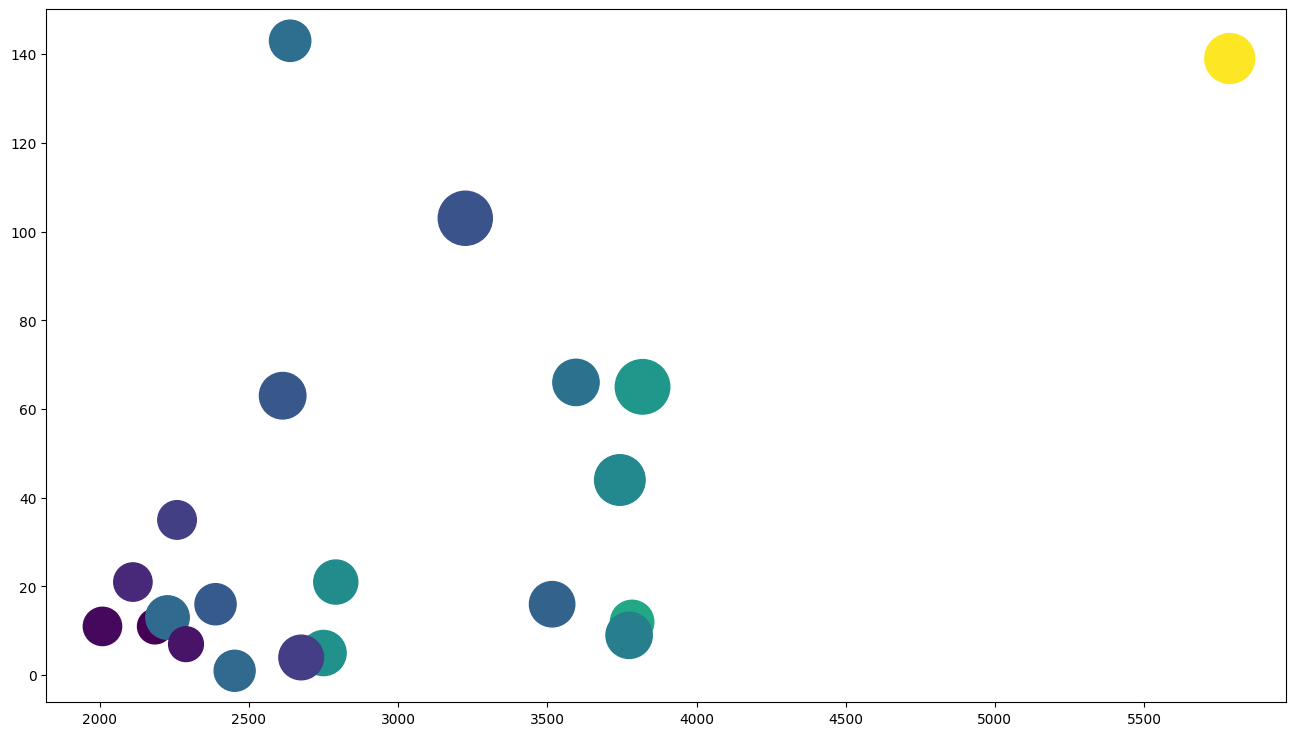

In [182]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],)

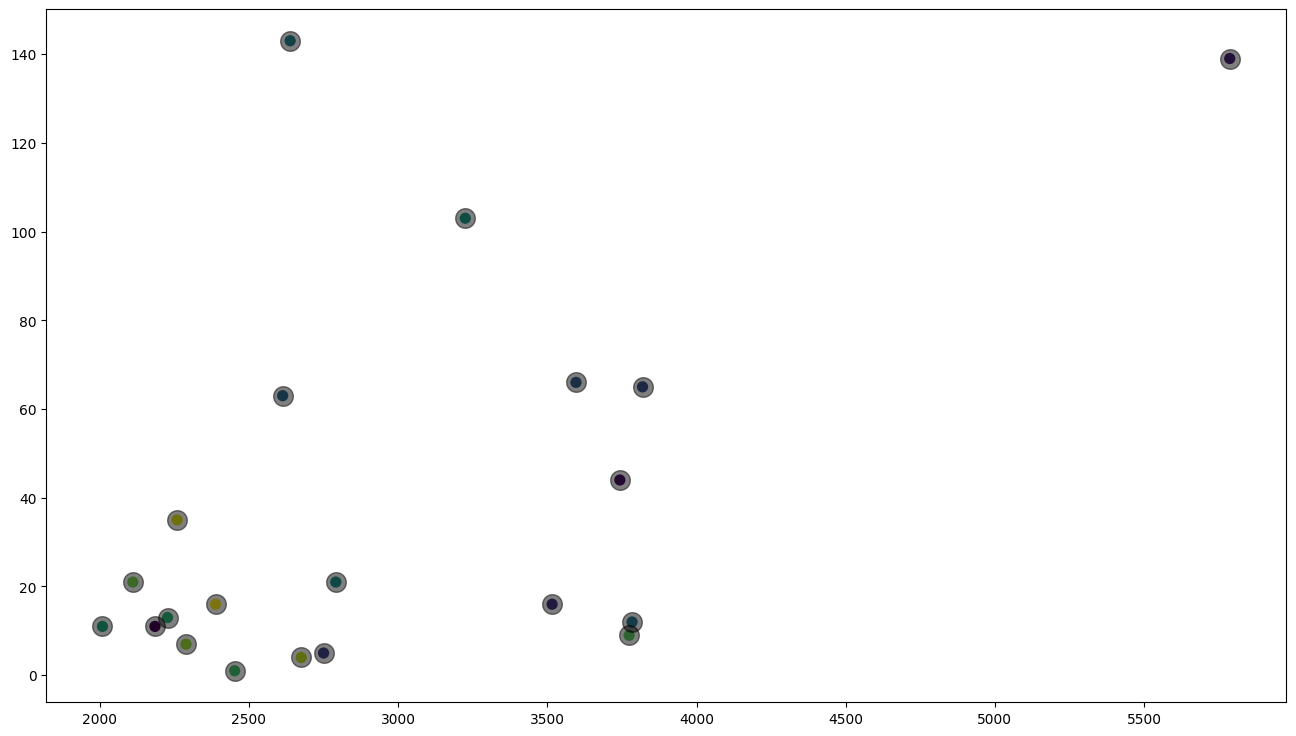

In [183]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis") # First 2 feature
centers = k_fit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="black",s = 200,alpha=0.5)

In [184]:
from mpl_toolkits.mplot3d import Axes3D


In [185]:
%matplotlib inline

In [186]:
kmeans= KMeans(n_clusters=21)
k_fit =kmeans.fit(df)
clusters= k_fit.labels_
centers = kmeans.cluster_centers_

In [187]:
plt.rcParams["figure.figsize"] =(16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2])
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="black",marker="*",s = 1000);
plt.show()

<Figure size 1600x900 with 0 Axes>

In [188]:
kmeans= KMeans(n_clusters=21)
k_fit =kmeans.fit(df)
clusters= k_fit.labels_

In [189]:
df


,624.0,845.0,745.0,740.0,121.0,442.0,946.0,341.0,330.0,930.0,...,353.0,870.0,924.0,840.0,948.0,884.0,904.0,830.0,432.0,882.0
nan,,,,,,,,,,,,,,,,,,,,,
Southwest,3743,44,1325,2578,202,812,283,1102,1629,1130,...,0,2,1,0,0,0,0,0,1,0
Central,5787,139,1288,3727,309,1519,402,2173,7351,1000,...,7,2,0,2,0,0,2,0,0,0
N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,532,...,2,0,0,0,1,0,0,0,0,0
Mission,2111,21,762,1801,138,767,239,720,1451,550,...,0,1,0,0,0,0,0,0,0,0
Devonshire,2185,11,632,1564,95,1188,245,1135,1965,583,...,0,1,1,0,0,0,0,1,0,0
Northeast,2227,13,981,2306,88,537,175,1101,2467,748,...,0,0,0,0,0,0,0,0,0,0
Harbor,2613,63,1120,2153,119,501,216,812,1331,825,...,0,1,2,0,0,0,0,0,0,0
Van Nuys,2388,16,878,2167,67,1109,293,1014,2217,577,...,0,1,0,1,0,0,0,0,0,0
West Valley,2259,35,770,1966,127,549,262,1083,2021,834,...,0,0,1,2,0,0,0,0,4,0


In [190]:
pd.DataFrame({"Urbans": df.index,"Clusters": clusters})[:21]

,Urbans,Clusters
0,Southwest,3
1,Central,2
2,N Hollywood,1
3,Mission,15
4,Devonshire,19
5,Northeast,14
6,Harbor,18
7,Van Nuys,5
8,West Valley,20
9,West LA,9


In [191]:
df["Clusters"] = clusters
df.head()

,624.0,845.0,745.0,740.0,121.0,442.0,946.0,341.0,330.0,930.0,...,870.0,924.0,840.0,948.0,884.0,904.0,830.0,432.0,882.0,Clusters
nan,,,,,,,,,,,,,,,,,,,,,
Southwest,3743,44,1325,2578,202,812,283,1102,1629,1130,...,2,1,0,0,0,0,0,1,0,3
Central,5787,139,1288,3727,309,1519,402,2173,7351,1000,...,2,0,2,0,0,2,0,0,0,2
N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,532,...,0,0,0,1,0,0,0,0,0,1
Mission,2111,21,762,1801,138,767,239,720,1451,550,...,1,0,0,0,0,0,0,0,0,15
Devonshire,2185,11,632,1564,95,1188,245,1135,1965,583,...,1,1,0,0,0,0,1,0,0,19


In [192]:
df.Clusters.unique()

array([ 3,  2,  1, 15, 19, 14, 18,  5, 20,  9, 13,  7, 16,  4,  0, 10, 12,
        6, 17, 11,  8], dtype=int32)

In [193]:
df["Clusters"]=df["Clusters"]+1

In [194]:
df.head(21)

,624.0,845.0,745.0,740.0,121.0,442.0,946.0,341.0,330.0,930.0,...,870.0,924.0,840.0,948.0,884.0,904.0,830.0,432.0,882.0,Clusters
nan,,,,,,,,,,,,,,,,,,,,,
Southwest,3743,44,1325,2578,202,812,283,1102,1629,1130,...,2,1,0,0,0,0,0,1,0,4
Central,5787,139,1288,3727,309,1519,402,2173,7351,1000,...,2,0,2,0,0,2,0,0,0,3
N Hollywood,2791,21,1007,2609,157,986,341,1531,2856,532,...,0,0,0,1,0,0,0,0,0,2
Mission,2111,21,762,1801,138,767,239,720,1451,550,...,1,0,0,0,0,0,0,0,0,16
Devonshire,2185,11,632,1564,95,1188,245,1135,1965,583,...,1,1,0,0,0,0,1,0,0,20
Northeast,2227,13,981,2306,88,537,175,1101,2467,748,...,0,0,0,0,0,0,0,0,0,15
Harbor,2613,63,1120,2153,119,501,216,812,1331,825,...,1,2,0,0,0,0,0,0,0,19
Van Nuys,2388,16,878,2167,67,1109,293,1014,2217,577,...,1,0,1,0,0,0,0,0,0,6
West Valley,2259,35,770,1966,127,549,262,1083,2021,834,...,0,1,2,0,0,0,0,4,0,21


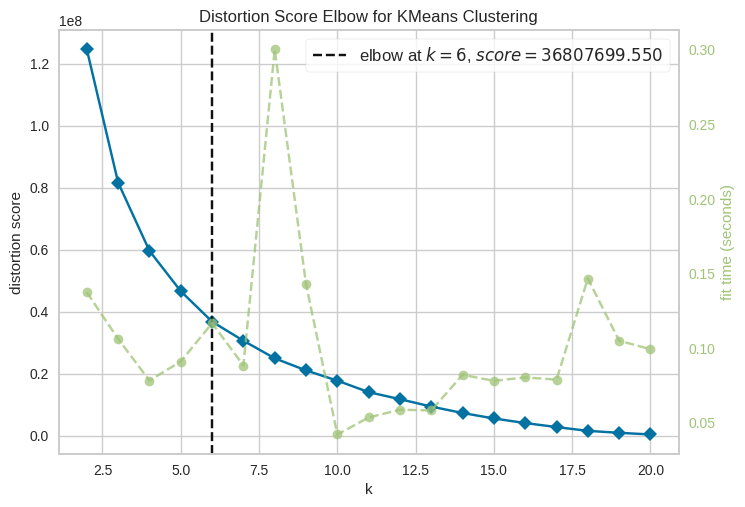

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [201]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Assuming df is your DataFrame

# Convert all feature names to strings
df.columns = df.columns.astype(str)

# Create a KMeans model
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2, min(50, len(df))))

# Fit the visualizer on your data
visualizer.fit(df)

# Display the visualization
visualizer.poof()